In [122]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
#Import the Dataset
data = pd.read_csv("emails.csv")

In [124]:
#Check the dataset
data.shape

(5728, 2)

In [125]:
#Load the Dataset
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [126]:
#Check the unique values
data.spam.unique()

array([1, 0])

In [127]:
#check the dataset status
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [128]:
#Check the Spam counts
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

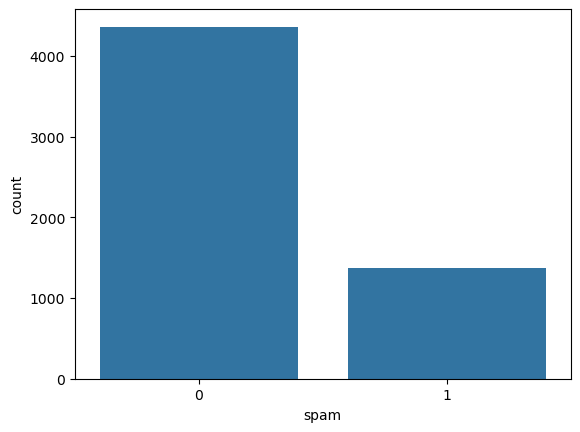

In [129]:
#Shoe Dataset data graphically
sns.countplot(x='spam',data=data)

In [130]:
#Check the Duplicated Values
data.duplicated().sum()

np.int64(33)

In [131]:
#Remove the Duplicates
data.drop_duplicates(inplace=True)

In [132]:
#Check the Duplicated Values
data.duplicated().sum()

np.int64(0)

In [133]:
#Check the Empty Values
data.isnull()

,text,spam
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5723,False,False
5724,False,False
5725,False,False
5726,False,False


In [134]:
#Check the Spam counts
data['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

## Separate Axises

In [135]:
#Separate Axises
x = data['text'].values
y = data['spam'].values

In [136]:
#Check data
y

array([1, 1, 1, ..., 0, 0, 0])

In [137]:
#Check data
x

array(["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : y

## Train Test Split Dataset Data

In [138]:
#Import the Library
from sklearn.model_selection import train_test_split
# train the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [139]:
#Check the Data
print(x_train.shape)
print("*********************")
print(x_test.shape)
print("*********************")
print(y_train.shape)
print("*********************")
print(y_test.shape)
print("*********************")

(4556,)
*********************
(1139,)
*********************
(4556,)
*********************
(1139,)
*********************


## Preprocesssing The Data

###### This method Include the Pipeline Options to create a model trained by a various level with the different optiona, also the sample general model tarining optiona available in below. 

In [150]:
#Import the Library
from sklearn.feature_extraction.text import CountVectorizer
#Create A Pipeline to Train the Models
from sklearn.pipeline import make_pipeline
#Import Libraries for model
from sklearn.naive_bayes import MultinomialNB

In [141]:
#create a Model
cv = CountVectorizer()
#Create a Pipelin Model
nb = MultinomialNB()

In [142]:
#Initialize the Pipeline
pipe = make_pipeline(cv,nb)

In [143]:
#Setup the Pipeline
pipe.fit(x_train,y_train)

,steps,"[('countvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [145]:
#Check the Accuracy Score
y_prediction = pipe.predict(x_test)
y_prediction

array([1, 0, 0, ..., 0, 0, 0])

In [149]:
#Check the Accuracy
#Import libraries
from sklearn.metrics import accuracy_score
accuracy_score(y_prediction,y_test)

0.990342405618964

In [151]:
#Check the Model input from Smaple Data
email = ['hey, Jack whats up']
pipe.predict(email)

array([0])

In [152]:
#Check the Model input from Smaple Data
email = ['Double your money in 7 days guaranteed']
pipe.predict(email)

array([1])

In [154]:
#Save the Model
import pickle
pickle.dump(pipe,open("model.pickle","wb"))

##### Above Methods Are Called to implement a Model with A Pipeleine method to ease the Model Training & Test Implemtation. 
###### -----------
##### Below Method are called to implement a model with a sample general procedures with categorizing & Splitting the data

In [ ]:
#Transform data
x_train = cv.fit_transform(x_train)

In [ ]:
#Get Trained data to array
x_train.toarray()

## Train the Model

In [ ]:
#Create A Trained Model
nb = MultinomialNB()
nb.fit(x_train,y_train)

In [ ]:
#Transform the X_Text Data
x_test = cv.transform(x_test)

In [ ]:
#Get the Model Prediction
y_prediction = nb.predict(x_test)

## Check the Accuracy of the Model

In [ ]:
#Import libraries
from sklearn.metrics import accuracy_score

In [ ]:
#Check the Accuracy
accuracy_score(y_prediction,y_test)

In [ ]:
#Get the Prediction
email = ['hey, Jack whats up']
clearn_email = cv.transform(email)

In [ ]:
#check the prediction on input data
nb.predict(clearn_email)

In [ ]:
#Get the Prediction
email = ['Final notice: Your account will be suspended']
clearn_email = cv.transform(email)
#check the prediction on input data
nb.predict(clearn_email)

In [ ]:
#Get the Prediction
email = ['Double your money in 7 days guaranteed']
clearn_email = cv.transform(email)
#check the prediction on input data
nb.predict(clearn_email)

## Samples with Looping Methods

In [ ]:
#Get the Prediction check loop
email = ['Double your money in 7 days guaranteed']
clearn_email = cv.transform(email)
predict = nb.predict(clearn_email)[0]

if predict == 0:
    print("Not An Spam Email")
else:
    print("This is spam Email")

In [ ]:
#Get the Prediction check loop
email = ['hey, Jack whats up']
clearn_email = cv.transform(email)
predict = nb.predict(clearn_email)[0]

if predict == 0:
    print("Not An Spam Email")
else:
    print("This is spam Email")